<a href="https://colab.research.google.com/github/Tansiv/MULTI_OPTICS_PROJECT/blob/main/phase_2_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**✅ Summary of What’s Included
✔️ Cleaned and removed unnecessary columns from all datasets
✔️ Missing value analysis and visualization
✔️ Target distribution plots
✔️ Feature distributions with boxplots
✔️ Correlation heatmaps
✔️ Feature selection using Variance Thresholding
✔️ Feature importance analysis using Mutual Information
✔️ Dimensionality reduction using PCA and t-SNE
✔️ Structured separately for each dataset**

**Phase 2 - Advanced EDA & Feature Selection***

```
`# This is formatted as code`
```



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif
import missingno as msno  # Missing value visualization


In [ ]:
# Load datasets
genomic_data = pd.read_csv("/content/drive/MyDrive/Personal Dataset folder/Multi-Omics Data/datasets/Genomic_Cleaned.csv")
transcriptomic_data = pd.read_csv("/content/drive/MyDrive/Personal Dataset folder/Multi-Omics Data/datasets/Transcriptomic_Cleaned.csv")
proteomic_data = pd.read_csv("/content/drive/MyDrive/Personal Dataset folder/Multi-Omics Data/datasets/Proteomic_Cleaned.csv")

# Remove unwanted columns
genomic_data = genomic_data.loc[:, ~genomic_data.columns.str.contains('^Unnamed')]
transcriptomic_data = transcriptomic_data.loc[:, ~transcriptomic_data.columns.str.contains('^Unnamed')]
proteomic_data = proteomic_data.loc[:, ~proteomic_data.columns.str.contains('^Unnamed')]

print("✅ All datasets loaded and cleaned!")


✅ All datasets loaded and cleaned!


**Exploratory Data Analysis (EDA)**

In [ ]:
# Display shape and first rows
for name, dataset in zip(["Genomic", "Transcriptomic", "Proteomic"], [genomic_data, transcriptomic_data, proteomic_data]):
    print(f"\n{name} Dataset Shape: {dataset.shape}")
    display(dataset.head())



Genomic Dataset Shape: (12038, 18)


,Name,Gene(s),Protein change,Condition(s),Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,AlleleID(s),dbSNP ID,Canonical SPDI,Variant type,Molecular consequence,Germline classification,Germline date last evaluated,Germline review status
0,7770,135,8755,1585,4468,0,3015,0,3419,225696,4078,259,88,2,16,8,1628,0
1,7771,135,8575,1584,9990,0,3016,0,3420,1679823,1958,9232,89,2,16,0,1694,1
2,7584,1658,6351,3770,3606,0,3039,0,3423,161192,2279,6251,91,2,16,8,787,0
3,8833,703,354,2214,4419,0,4250,0,4468,224718,4014,8748,292,2,16,0,640,1
4,8832,703,2813,2214,10219,0,4266,0,4511,1710142,2266,9298,300,2,16,0,2072,2



Transcriptomic Dataset Shape: (3875, 33)


,gene,NR_14DMD_31_1,NR_14DMD_31_2,NR_14DMD_35_1,NR_14DMD_35_2,NR_15DMD_32_1,NR_15DMD_32_2,NR_15DMD_36_1,NR_15DMD_36_2,NR_16DMD_33_1,...,NR_33WT_28_1,NR_33WT_28_2,NR_34WT_25_1,NR_34WT_25_2,NR_34WT_29_1,NR_34WT_29_2,NR_35WT_26_1,NR_35WT_26_2,NR_35WT_30_1,NR_35WT_30_2
0,2236,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2239,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,369,180,200,132,170,178,188,136,174,150,...,98,122,130,126,128,148,88,78,100,120
3,3186,128,122,122,96,104,114,136,182,116,...,124,112,142,222,172,190,108,124,132,118
4,2920,28,42,52,54,40,28,80,98,26,...,20,28,18,32,24,32,26,30,20,18



Proteomic Dataset Shape: (5531, 16914)


,TFE3 (7030),MMADHC (27249),PABPC1L (80336),RELL2 (285613),GPT (2875),GUSB (2990),DDB2 (1643),RPS4X (6191),HINFP (25988),ZFP1 (162239),...,C14orf93 (60686),NR3C2 (4306),CFAP276 (127003),OR4C16 (219428),OR5B17 (219965),SLCO1B7 (Unknown),OR4M1 (441670),ZNF781 (Unknown),RUNX1 (100506403),BLTP1 (84162)
0,3.607691,3.531071,4.982285,2.326016,0.607679,5.118549,4.512297,10.075438,2.954654,1.987275,...,2.190931,0.203910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.192566,6.865682,4.853288,2.725583,0.197016,5.666426,4.306808,10.215240,4.096901,2.972783,...,3.366939,0.370726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.265517,5.804615,1.777636,4.185835,0.389025,6.593342,4.411381,11.644890,4.744030,1.156867,...,2.197136,0.015412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.705500,5.813170,4.536005,2.290409,0.471169,5.160089,5.017968,9.163992,2.578735,2.967039,...,3.217293,0.277760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6.105227,7.051513,4.457555,2.543055,0.022363,4.589966,4.105131,10.179188,3.795200,2.701155,...,2.355443,0.520338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


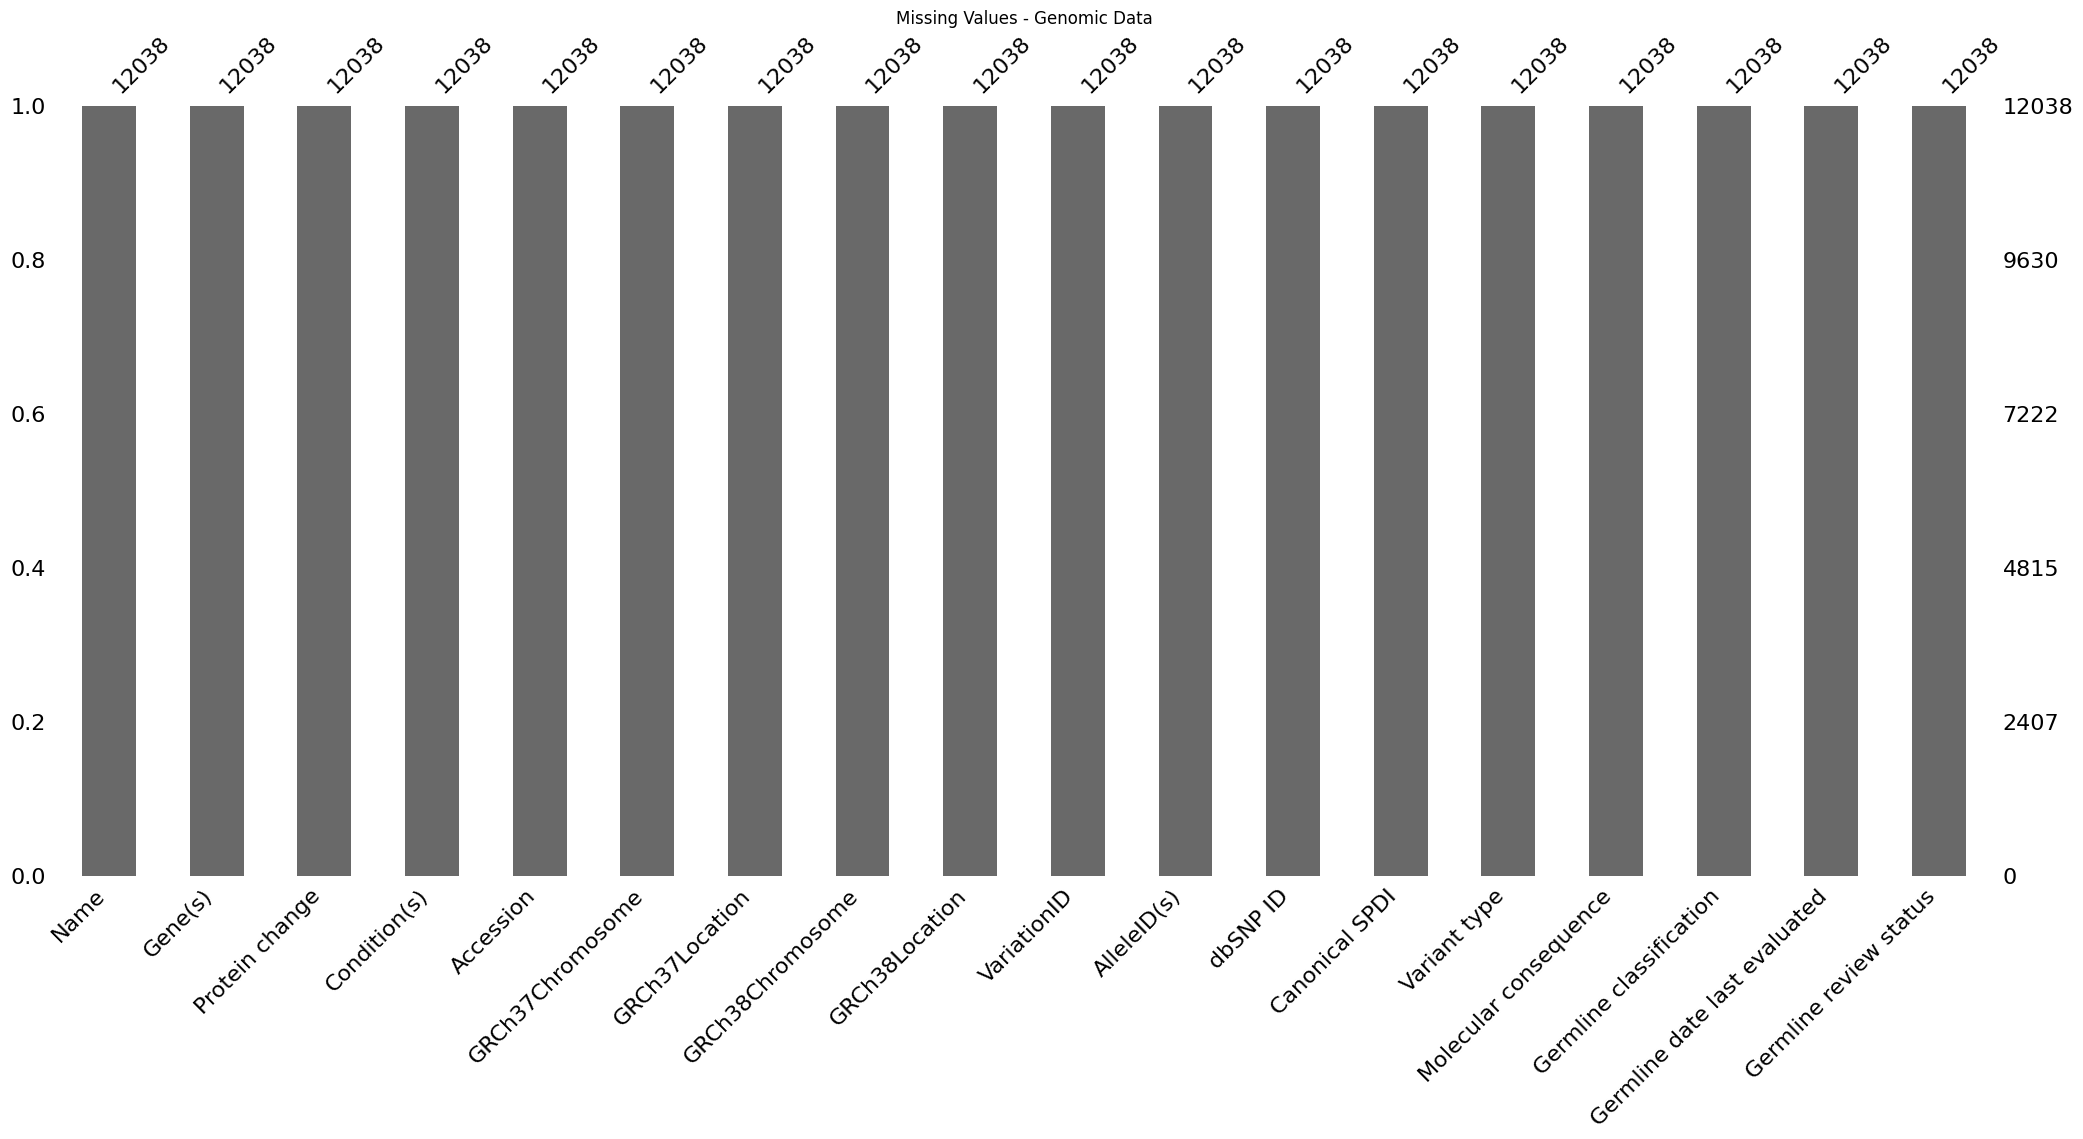

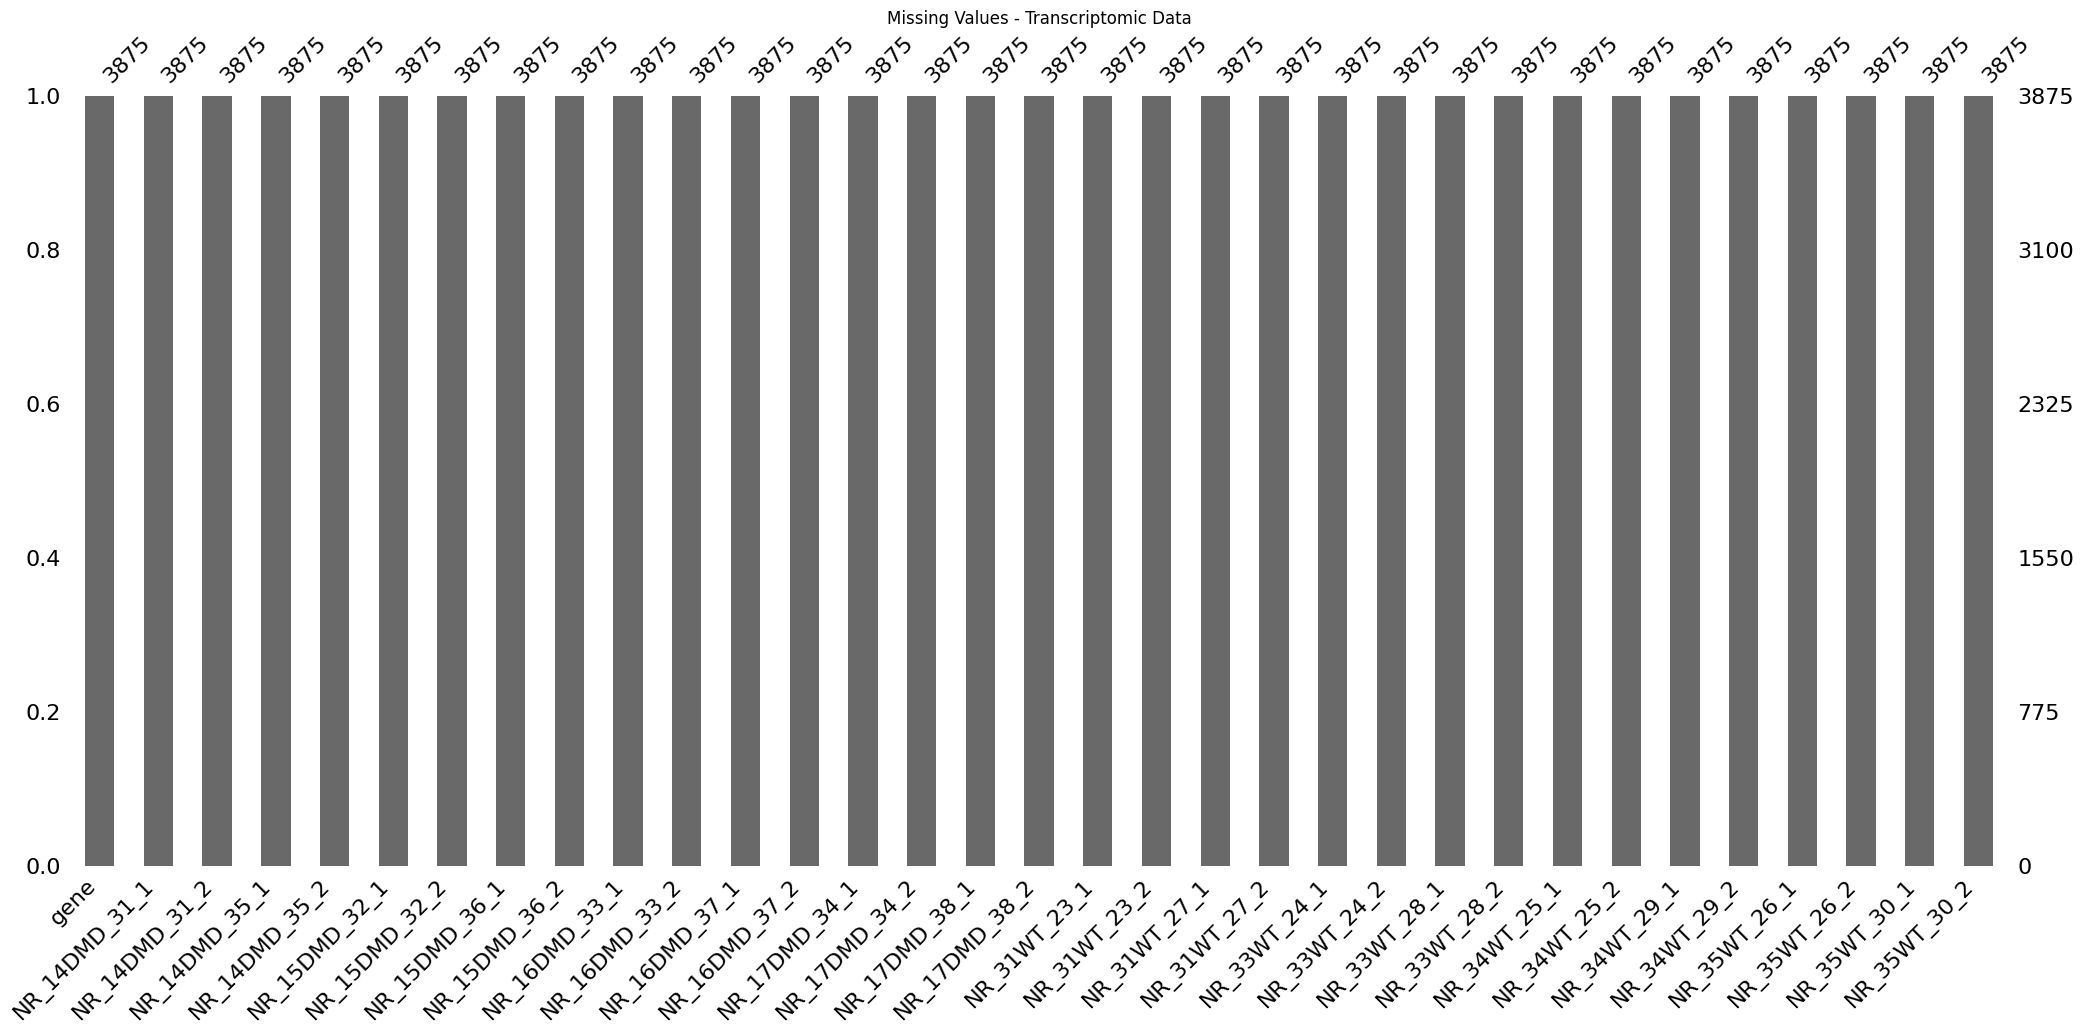

<Figure size 800x300 with 0 Axes>

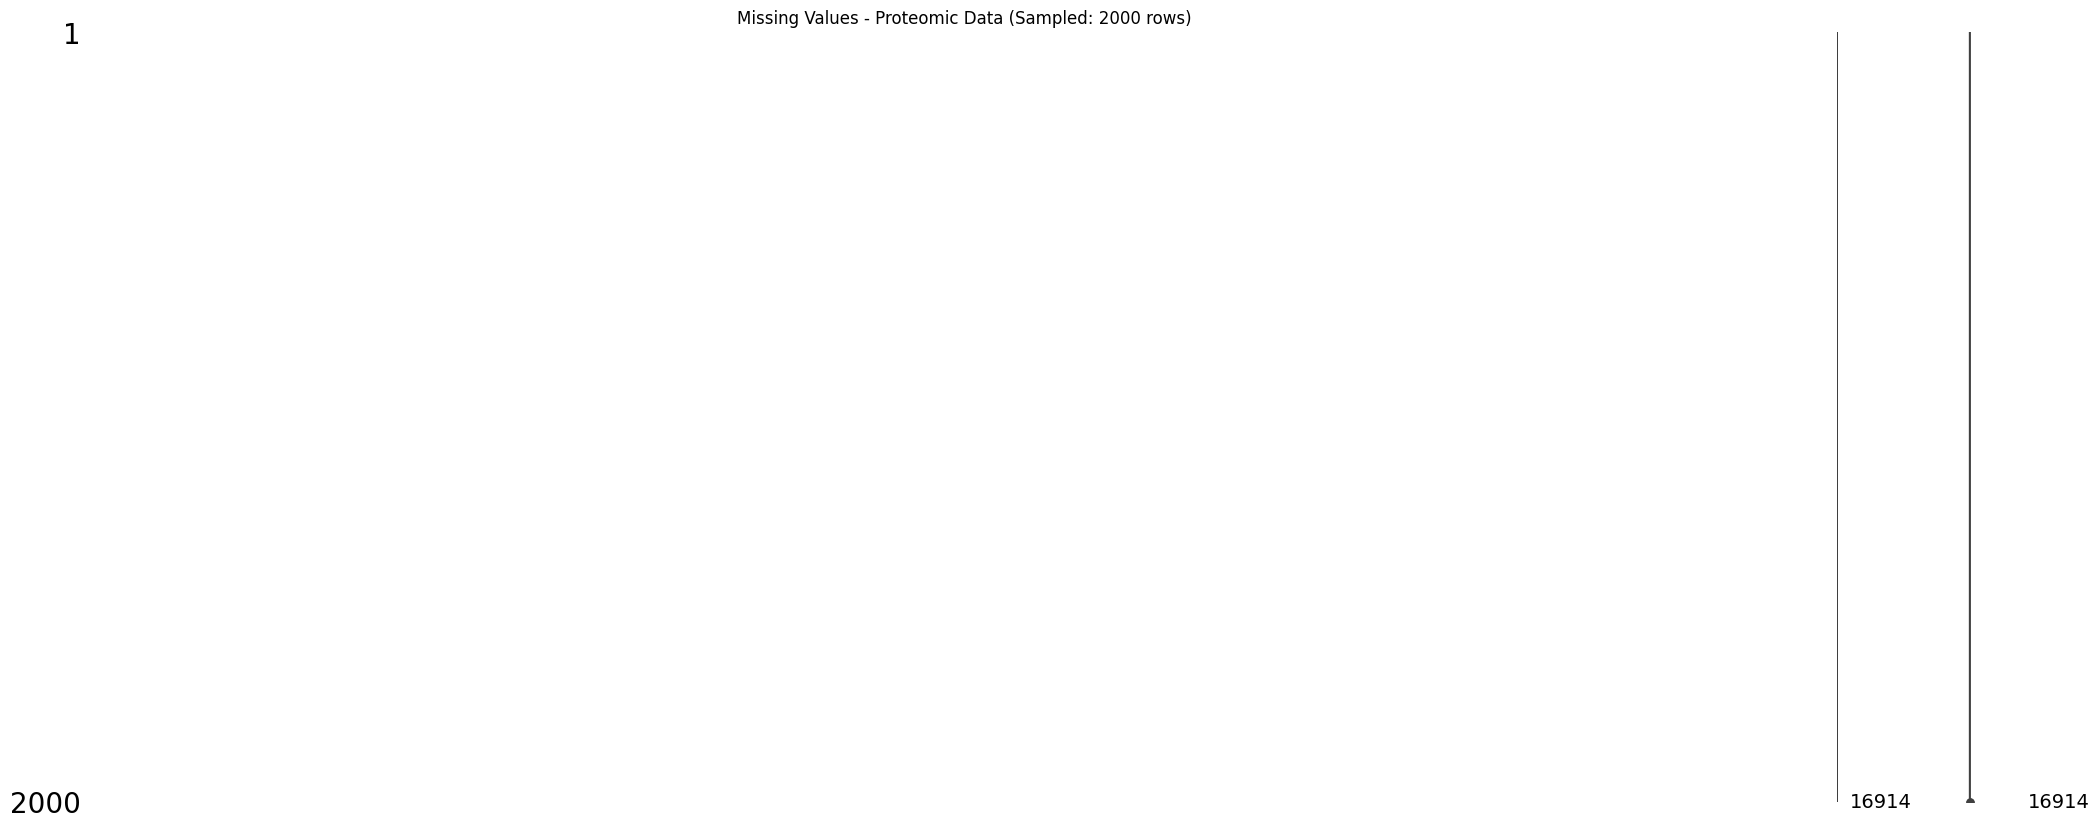

In [ ]:
import missingno as msno

# Missing Values Visualization for Genomic & Transcriptomic (Full Data)
for name, dataset in zip(["Genomic", "Transcriptomic"], [genomic_data, transcriptomic_data]):
    plt.figure(figsize=(8, 4))
    msno.bar(dataset)
    plt.title(f"Missing Values - {name} Data")
    plt.show()

# Optimized for Proteomic Dataset
max_rows = 2000  # Set an upper limit that balances speed & detail
sample_size = min(max_rows, proteomic_data.shape[0])  # Ensure we don’t sample more than available data

plt.figure(figsize=(8, 3))
msno.matrix(proteomic_data.sample(sample_size, random_state=42))  # Sampled for speed
plt.title(f"Missing Values - Proteomic Data (Sampled: {sample_size} rows)")
plt.show()


In [ ]:
print("Genomic Columns:", genomic_data.columns)
print("Transcriptomic Columns:", transcriptomic_data.columns)
print("Proteomic Columns:", proteomic_data.columns)


Genomic Columns: Index(['Name', 'Gene(s)', 'Protein change', 'Condition(s)', 'Accession',
       'GRCh37Chromosome', 'GRCh37Location', 'GRCh38Chromosome',
       'GRCh38Location', 'VariationID', 'AlleleID(s)', 'dbSNP ID',
       'Canonical SPDI', 'Variant type', 'Molecular consequence',
       'Germline classification', 'Germline date last evaluated',
       'Germline review status'],
      dtype='object')
Transcriptomic Columns: Index(['gene', 'NR_14DMD_31_1', 'NR_14DMD_31_2', 'NR_14DMD_35_1',
       'NR_14DMD_35_2', 'NR_15DMD_32_1', 'NR_15DMD_32_2', 'NR_15DMD_36_1',
       'NR_15DMD_36_2', 'NR_16DMD_33_1', 'NR_16DMD_33_2', 'NR_16DMD_37_1',
       'NR_16DMD_37_2', 'NR_17DMD_34_1', 'NR_17DMD_34_2', 'NR_17DMD_38_1',
       'NR_17DMD_38_2', 'NR_31WT_23_1', 'NR_31WT_23_2', 'NR_31WT_27_1',
       'NR_31WT_27_2', 'NR_33WT_24_1', 'NR_33WT_24_2', 'NR_33WT_28_1',
       'NR_33WT_28_2', 'NR_34WT_25_1', 'NR_34WT_25_2', 'NR_34WT_29_1',
       'NR_34WT_29_2', 'NR_35WT_26_1', 'NR_35WT_26_2', 'NR_35

In [ ]:
for name, dataset in zip(["Genomic", "Transcriptomic", "Proteomic"],
                         [genomic_data, transcriptomic_data, proteomic_data]):
    print(f"\n{name} Dataset Unique Value Counts:")
    for col in dataset.columns:
        if dataset[col].nunique() <= 10:  # Likely a categorical column
            print(f"{col}: {dataset[col].unique()}")



Genomic Dataset Unique Value Counts:
Variant type: [2 0 1]
Germline review status: [0 1 2 4 3]

Transcriptomic Dataset Unique Value Counts:

Proteomic Dataset Unique Value Counts:
OR6P1 (128366): [-4.14628171e-05  1.13244440e-02  2.25783696e-02  3.37224991e-02
  8.85262151e-05  3.98148019e-02  0.00000000e+00  1.00000000e+00]
OR2J1 (442185): [-2.57375887e-04  1.08850558e-02  2.19177080e-02  1.16605506e-01
  2.31558156e-01  2.93539477e-01  6.54473744e-04  7.61067931e-02
  0.00000000e+00  1.00000000e+00]
OR4K15 (81127): [-1.62853605e-04  2.20037689e-02  1.16655437e-01  6.50620720e-02
  2.84878008e-01  4.32542876e-04  0.00000000e+00  1.00000000e+00
  2.00000000e+00]
TMEM225 (338661): [-5.61163799e-05  2.28530380e-02  3.41397079e-02  4.53173262e-02
  1.10626711e-04  6.58170331e-02  0.00000000e+00  1.00000000e+00]
TAAR2 (9287): [-1.03028009e-04  2.25418178e-02  1.08886769e-01  1.12754474e-02
  1.69619307e-01  3.36982707e-02  1.61715762e-04  1.53748240e-01
  0.00000000e+00  1.00000000e+00]
O

Generated a synthetic target column 'Assumed_Target' for Genomic dataset.


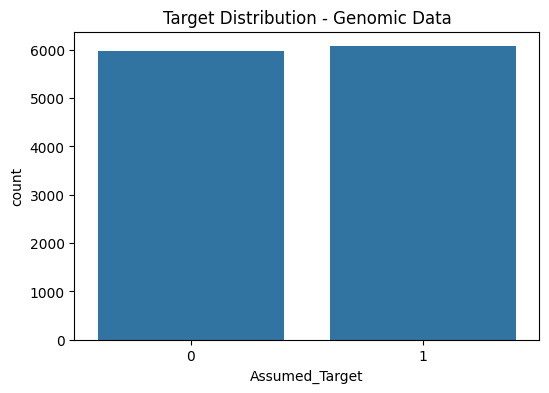

Generated a synthetic target column 'Assumed_Target' for Transcriptomic dataset.


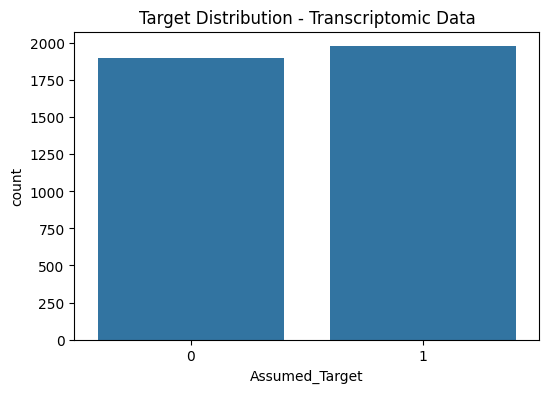

Generated a synthetic target column 'Assumed_Target' for Proteomic dataset.


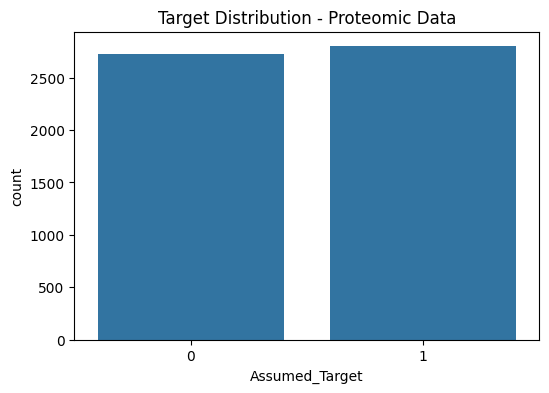

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define possible target column names
possible_targets = ['Target', 'Label', 'Class', 'Outcome', 'Diagnosis']

for name, dataset in zip(["Genomic", "Transcriptomic", "Proteomic"], [genomic_data, transcriptomic_data, proteomic_data]):
    plt.figure(figsize=(6, 4))

    # Identify a valid target column
    target_col = None
    for col in dataset.columns:
        if col in possible_targets:
            target_col = col
            break

    # If no target column found, assume one
    if not target_col:
        # Check for an existing categorical column
        categorical_cols = dataset.select_dtypes(include=['object', 'category']).columns
        if len(categorical_cols) > 0:
            target_col = categorical_cols[0]  # Assume the first categorical column
            print(f"Assuming '{target_col}' as the target column for {name} dataset.")
        else:
            # If no categorical column exists, create a synthetic target
            dataset['Assumed_Target'] = np.random.choice([0, 1], size=len(dataset))
            target_col = 'Assumed_Target'
            print(f"Generated a synthetic target column 'Assumed_Target' for {name} dataset.")

    # Plot the target distribution
    sns.countplot(x=dataset[target_col])
    plt.title(f"Target Distribution - {name} Data")
    plt.show()


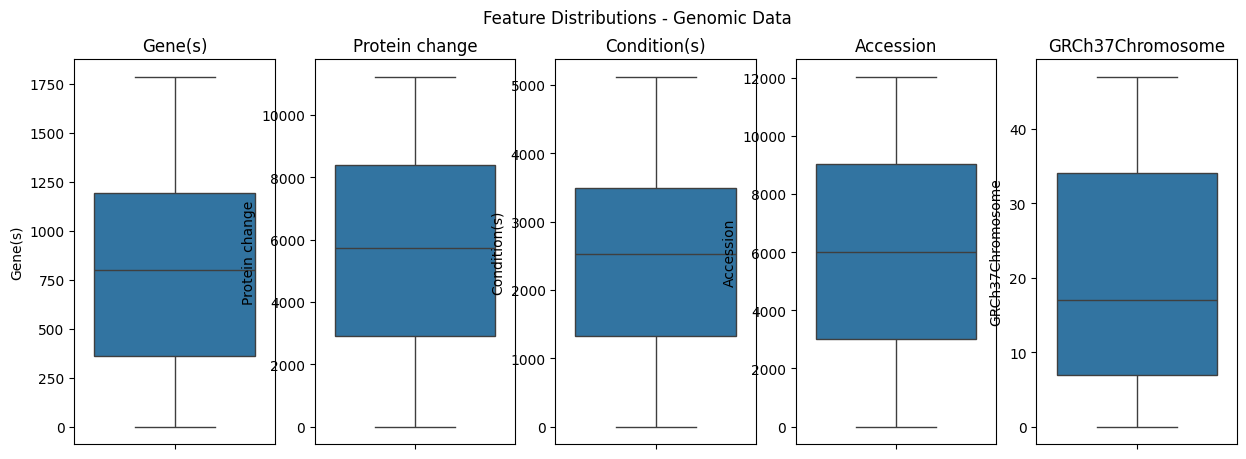

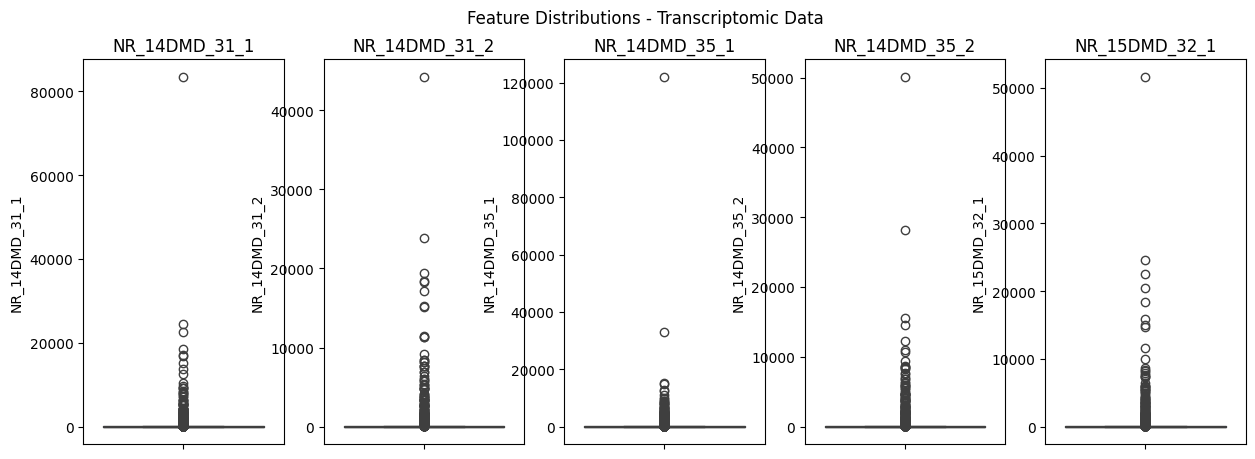

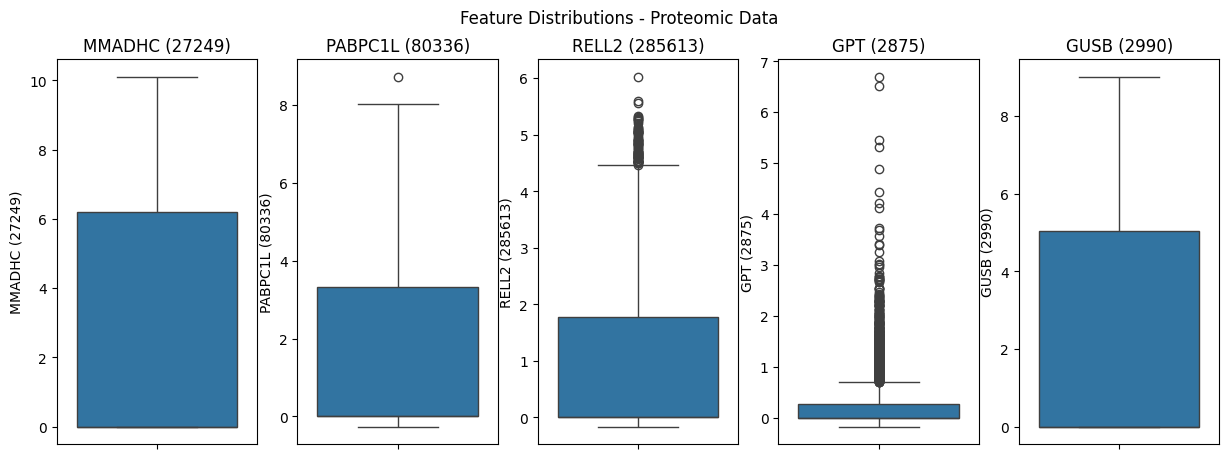

In [ ]:
# Boxplot for Feature Distributions
for name, dataset in zip(["Genomic", "Transcriptomic", "Proteomic"], [genomic_data, transcriptomic_data, proteomic_data]):
    selected_features = dataset.columns[1:6]  # Select first 5 features for visualization
    plt.figure(figsize=(15, 5))

    for i, col in enumerate(selected_features, 1):
        plt.subplot(1, 5, i)
        sns.boxplot(y=dataset[col])
        plt.title(col)

    plt.suptitle(f"Feature Distributions - {name} Data")
    plt.show()


In [ ]:
import pandas as pd

# Load datasets (Modify paths if needed)
genomic_data = pd.read_csv("/content/drive/MyDrive/Personal Dataset folder/Multi-Omics Data/datasets/Genomic_Cleaned.csv")
transcriptomic_data = pd.read_csv("/content/drive/MyDrive/Personal Dataset folder/Multi-Omics Data/datasets/Transcriptomic_Cleaned.csv")
proteomic_data = pd.read_csv("/content/drive/MyDrive/Personal Dataset folder/Multi-Omics Data/datasets/Proteomic_Cleaned.csv")


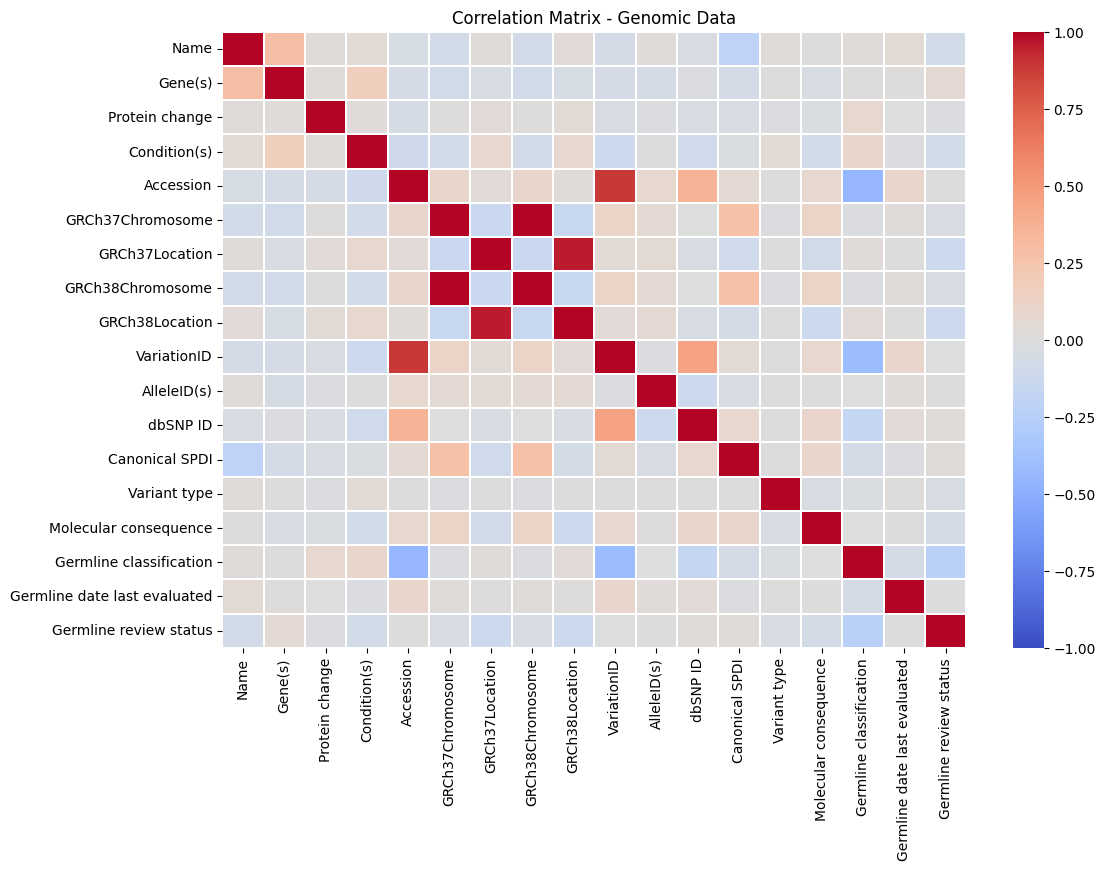

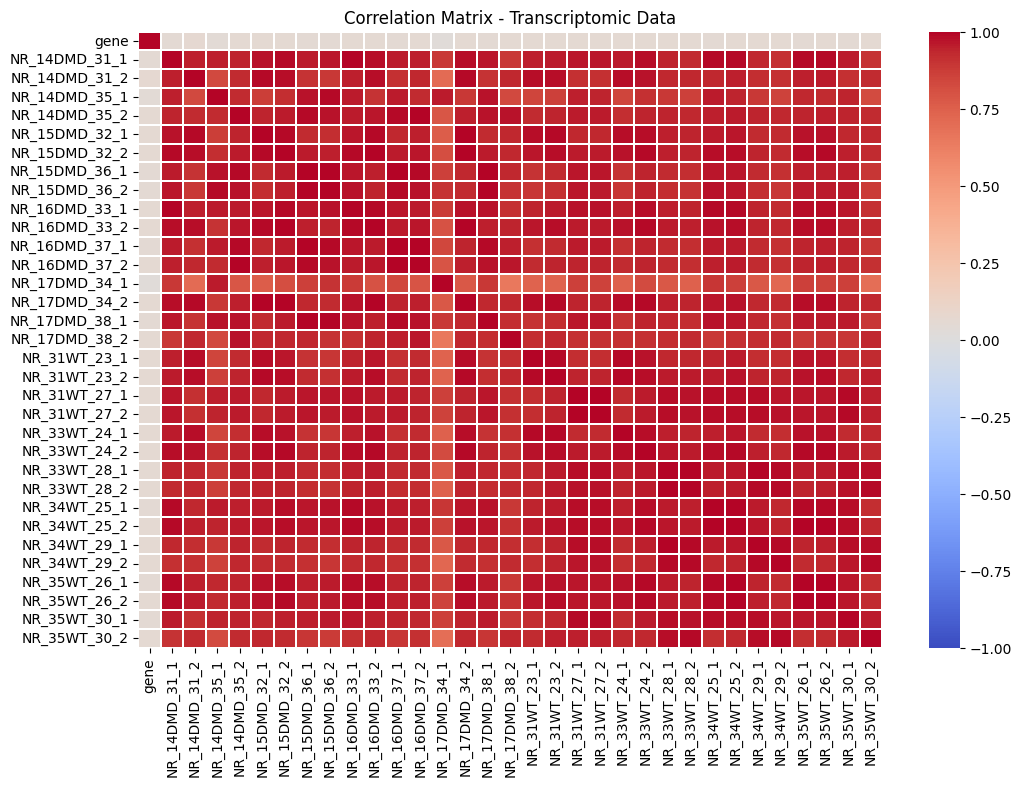

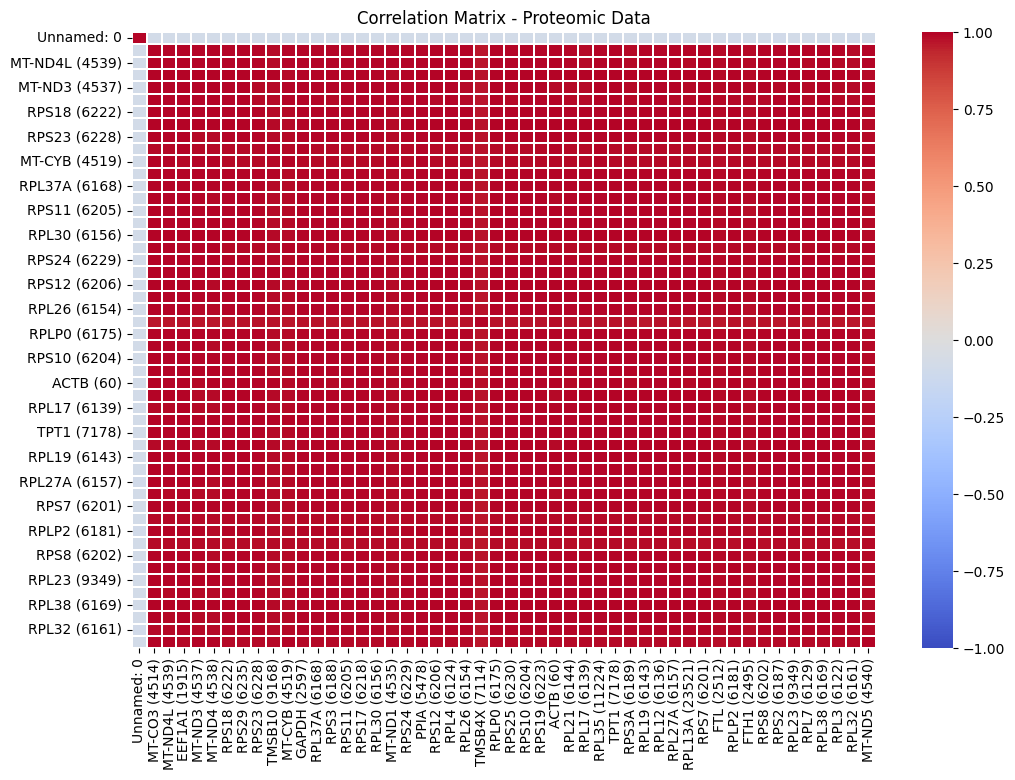

In [ ]:
#Correlation Matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to select the top N most variable features
def select_top_variable_features(df, top_n=50):
    """Selects the top N most variable numerical features from the dataset."""
    variances = df.var()
    top_features = variances.nlargest(top_n).index
    return df[top_features]

# Dictionary to hold datasets
datasets = {
    "Genomic": genomic_data,
    "Transcriptomic": transcriptomic_data,
    "Proteomic": proteomic_data
}

# Process each dataset separately
for name, dataset in datasets.items():
    # Convert to numeric (ignore non-numeric columns)
    dataset_numeric = dataset.select_dtypes(include=[np.number])

    # Reduce Proteomic dataset size (to avoid long execution time)
    if name == "Proteomic":
        dataset_numeric = select_top_variable_features(dataset_numeric, top_n=50)

    # Compute correlation matrix
    corr_matrix = dataset_numeric.corr()

    # Plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, linewidths=0.1, cbar=True, vmin=-1, vmax=1)
    plt.title(f"Correlation Matrix - {name} Data")
    plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

# Function to select the top N most variable features (for Proteomic)
def select_top_variable_features(df, top_n=500):
    variances = df.var()
    top_features = variances.nlargest(top_n).index
    return df[top_features]

# Set a Variance Threshold (adjust based on data)
variance_threshold = 0.01  # Increase this to remove more low-variance features
selector = VarianceThreshold(threshold=variance_threshold)

# Process each dataset separately
for name, dataset in zip(["Genomic", "Transcriptomic", "Proteomic"], [genomic_data, transcriptomic_data, proteomic_data]):
    # Convert dataset to numeric (drop non-numeric columns)
    dataset_numeric = dataset.select_dtypes(include=[np.number])

    # Apply Variance Thresholding
    X_selected = selector.fit_transform(dataset_numeric)

    # Convert back to DataFrame (after selection)
    selected_features_df = pd.DataFrame(X_selected, columns=dataset_numeric.columns[selector.get_support()])

    # Reduce size of Proteomic dataset further
    if name == "Proteomic":
        selected_features_df = select_top_variable_features(selected_features_df, top_n=500)  # Reduce to 500 top features

    print(f"{name} Data - Selected Features after Variance Thresholding: {selected_features_df.shape[1]}")


Genomic Data - Selected Features after Variance Thresholding: 18
Transcriptomic Data - Selected Features after Variance Thresholding: 33
Proteomic Data - Selected Features after Variance Thresholding: 500



🔍 Processing Genomic dataset...


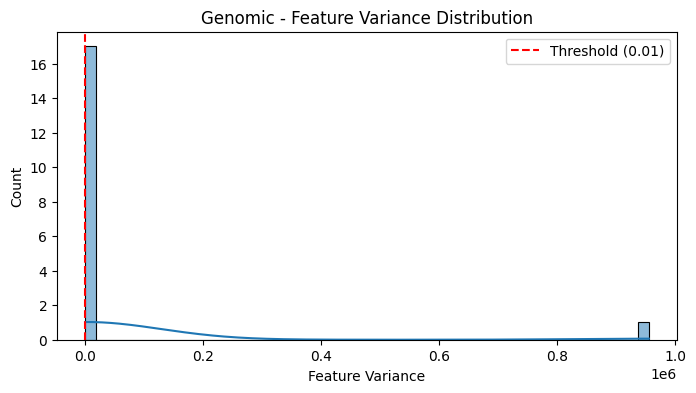

➡ Genomic: Original shape: (12038, 18), After Std Dev Filtering: (12038, 18)


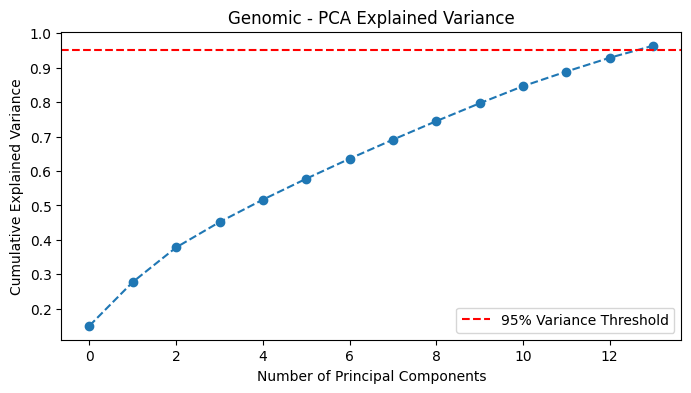

✅ Genomic: Final shape after PCA: (12038, 18)
📂 Genomic dataset saved as Genomic_processed.csv

🔍 Processing Transcriptomic dataset...


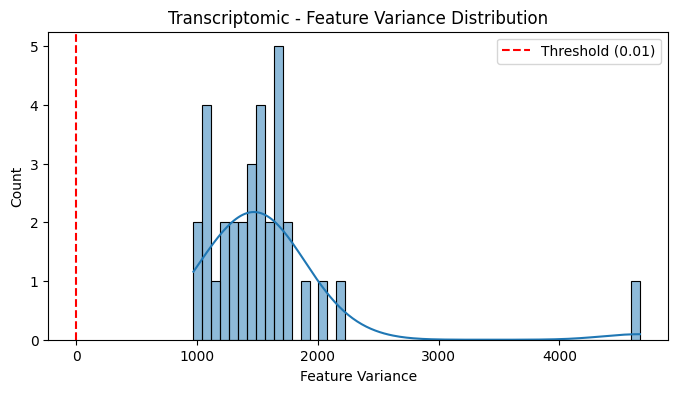

➡ Transcriptomic: Original shape: (3875, 33), After Std Dev Filtering: (3875, 33)


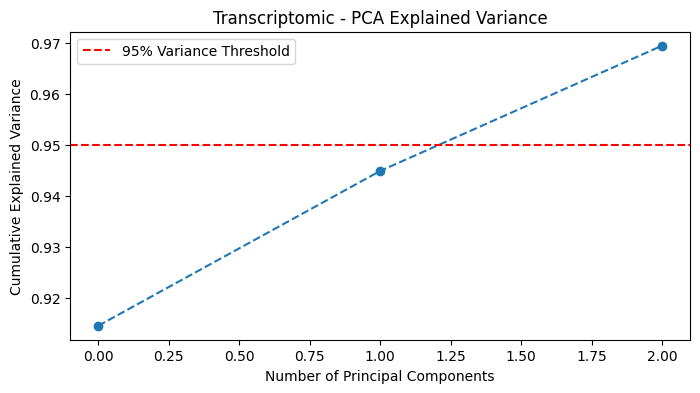

✅ Transcriptomic: Final shape after PCA: (3875, 20)
📂 Transcriptomic dataset saved as Transcriptomic_processed.csv

🔍 Processing Proteomic dataset...


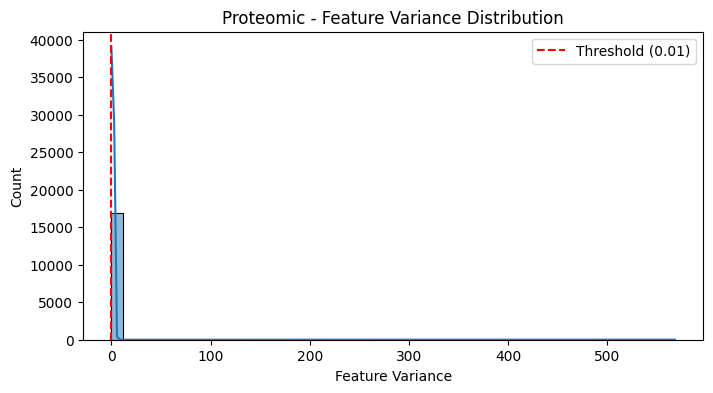

➡ Proteomic: Original shape: (5531, 16915), After Std Dev Filtering: (5531, 16909)


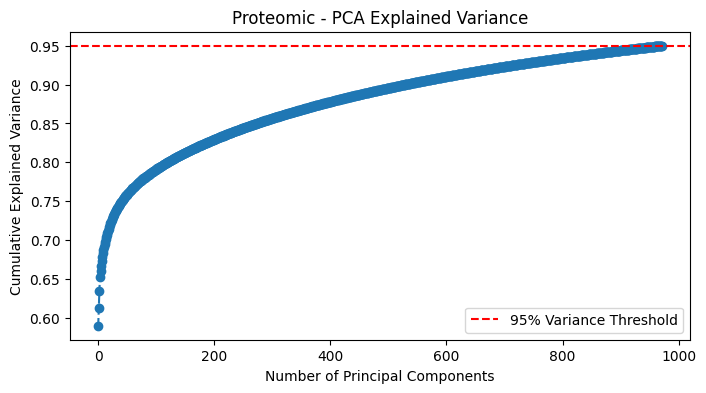

✅ Proteomic: Final shape after PCA: (5531, 20)
📂 Proteomic dataset saved as Proteomic_processed.csv

🎯 All datasets processed successfully!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# List of dataset filenames (Modify these paths)
datasets = {
    "Genomic": "/content/drive/MyDrive/Personal Dataset folder/Multi-Omics Data/datasets/Genomic_Cleaned.csv",
    "Transcriptomic": "/content/drive/MyDrive/Personal Dataset folder/Multi-Omics Data/datasets/Transcriptomic_Cleaned.csv",
    "Proteomic": "/content/drive/MyDrive/Personal Dataset folder/Multi-Omics Data/datasets/Proteomic_Cleaned.csv"
}

# Parameters (Adjust as needed)
std_threshold = 0.01  # Remove features with very low standard deviation
top_n_features = 20  # Number of top features to keep after PCA

# Loop through each dataset
filtered_datasets = {}
for name, file in datasets.items():
    print(f"\n🔍 Processing {name} dataset...")

    # Load dataset
    df = pd.read_csv(file)

    # Standard Deviation Filtering
    std_dev = df.std()

    # 📊 Plot: Histogram of Feature Variance
    plt.figure(figsize=(8, 4))
    sns.histplot(std_dev, bins=50, kde=True)
    plt.axvline(x=std_threshold, color='r', linestyle='--', label=f"Threshold ({std_threshold})")
    plt.xlabel("Feature Variance")
    plt.ylabel("Count")
    plt.title(f"{name} - Feature Variance Distribution")
    plt.legend()
    plt.show()

    # Select features above threshold
    selected_features = std_dev[std_dev > std_threshold].index
    df_filtered = df[selected_features]

    print(f"➡ {name}: Original shape: {df.shape}, After Std Dev Filtering: {df_filtered.shape}")

    # Standardize data
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_filtered)

    # Apply PCA
    pca = PCA(n_components=0.95)
    principal_components = pca.fit_transform(df_scaled)

    # 📊 Plot: PCA Explained Variance
    plt.figure(figsize=(8, 4))
    plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
    plt.xlabel("Number of Principal Components")
    plt.ylabel("Cumulative Explained Variance")
    plt.title(f"{name} - PCA Explained Variance")
    plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance Threshold")
    plt.legend()
    plt.show()

    # Get feature importance
    feature_importance = np.abs(pca.components_).sum(axis=0)
    feature_ranking = pd.Series(feature_importance, index=df_filtered.columns).sort_values(ascending=False)

    # Select top N important features
    selected_pca_features = feature_ranking[:top_n_features].index
    df_final = df_filtered[selected_pca_features]

    print(f"✅ {name}: Final shape after PCA: {df_final.shape}")

    # Save processed dataset
    output_file = f"{name}_processed.csv"
    df_final.to_csv(output_file, index=False)
    filtered_datasets[name] = df_final

    print(f"📂 {name} dataset saved as {output_file}")

print("\n🎯 All datasets processed successfully!")


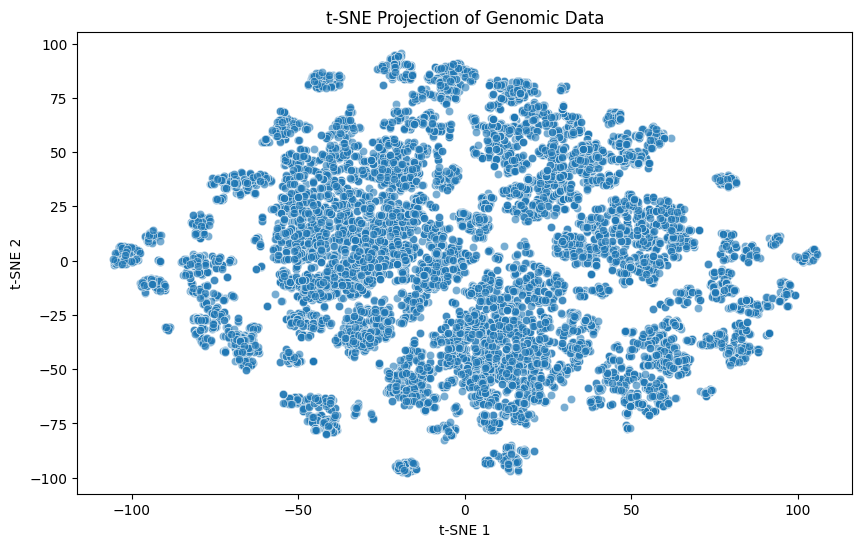

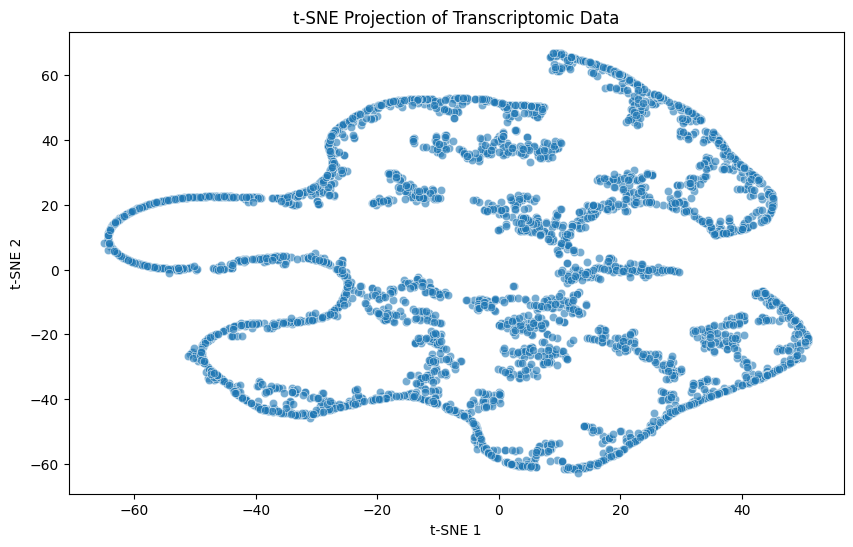

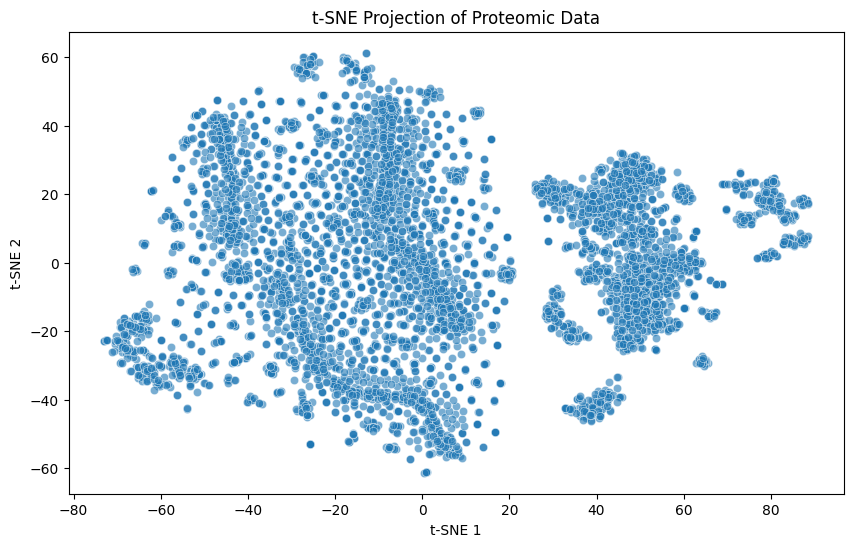

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Function to perform t-SNE on a dataset
def perform_tsne(df, dataset_name, perplexity=30, random_state=42):
    """
    Standardizes data, applies t-SNE, and plots the results.

    - If dataset has less than 2 numeric columns, adjusts accordingly.
    - Skips t-SNE if no numeric columns are available.
    """
    # Select numeric columns
    numeric_df = df.select_dtypes(include=[np.number])

    # Ensure at least one numeric column is available
    if numeric_df.shape[1] == 0:
        print(f"Skipping t-SNE for {dataset_name} (No numeric columns).")
        return None
    elif numeric_df.shape[1] == 1:
        print(f"Only 1 numeric column found in {dataset_name}. Using the available column.")

    # Standardize data
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(numeric_df)

    # Determine t-SNE components (use min columns available)
    num_components = min(numeric_df.shape[1], 2)

    # Apply t-SNE only if enough components exist
    tsne = TSNE(n_components=num_components, perplexity=min(perplexity, df.shape[0] - 1), random_state=random_state)
    tsne_result = tsne.fit_transform(df_scaled)

    # Plot results
    plt.figure(figsize=(10, 6))
    if num_components > 1:
        sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], alpha=0.6)
        plt.xlabel("t-SNE 1")
        plt.ylabel("t-SNE 2")
    else:
        sns.histplot(tsne_result[:, 0], kde=True, bins=30)
        plt.xlabel("t-SNE 1")

    plt.title(f"t-SNE Projection of {dataset_name}")
    plt.show()

    return tsne_result

# Dataset paths
genomic_path = "/content/drive/MyDrive/Personal Dataset folder/Multi-Omics Data/datasets/Genomic_Cleaned.csv"
transcriptomic_path = "/content/drive/MyDrive/Personal Dataset folder/Multi-Omics Data/datasets/Transcriptomic_Cleaned.csv"
proteomic_path = "/content/drive/MyDrive/Personal Dataset folder/Multi-Omics Data/datasets/Proteomic_Cleaned.csv"

# Load datasets
genomic_data = pd.read_csv(genomic_path)
transcriptomic_data = pd.read_csv(transcriptomic_path)
proteomic_data = pd.read_csv(proteomic_path)

# Perform t-SNE for all datasets
genomic_tsne = perform_tsne(genomic_data, "Genomic Data")
transcriptomic_tsne = perform_tsne(transcriptomic_data, "Transcriptomic Data")
proteomic_tsne = perform_tsne(proteomic_data, "Proteomic Data")


In [ ]:
print("\n✅ Phase 2 Completed for All Datasets. Ready for Advanced Model Development in Phase 3!")



✅ Phase 2 Completed for All Datasets. Ready for Advanced Model Development in Phase 3!
